<h1 align="center" style="font-size:50px;">AliPainter & AliDrawStyle</h1>
<h6 align="center" style="color:#808080;">Description and usage of QA visualization tools</h6>
<h6 align="right" style="color:#808080;"><a href="mailto:boris.rumyantsev@cern.ch">Boris Rumyantsev</a></h6>
<h6 align="right" style="color:#808080;"><a href="mailto:marian.ivanov@cern.ch">Marian Ivanov</a></h6>
<h6 align="right" style="color:#808080;">July 2018</h6>

***
<h2 align="left" style="font-size:35px;">Content:</h2>

<p style="font-size:20px;"><a href=#intro>1. Introduction</a></p>
<p style="font-size:20px;"><a href=#srcs>2. Getting the sources</a></p>
<p style="font-size:20px;"><a href=#style>3. Styling</a></p>
<p style="font-size:15px;text-indent:30px;"><a href=#style_css_syn>3.1. Syntax of CSS</a></p>
<p style="font-size:15px;text-indent:30px;"><a href=#style_css_ex>3.2. Simple examples</a></p>
<p style="font-size:15px;text-indent:30px;"><a href=#style_css_local>3.3. Local styles</a></p>
<p style="font-size:15px;text-indent:30px;"><a href=#style_css_app>3.4. Applications</a></p>
    
<p style="font-size:20px;"><a href=#draw>4. Projections analysis of n-dimensional histograms</a></p>
<p style="font-size:15px;text-indent:30px;"><a href=#draw_purposes>4.1. Purposes</a></p>
<p style="font-size:15px;text-indent:30px;"><a href=#draw_interface>4.2. Interface of AliPainter::DrawHistogram()</a></p>
<p style="font-size:15px;text-indent:30px;"><a href=#draw_examples>4.3. Examples of usage AliPainter::DrawHistogram()</a></p>
<p style="font-size:15px;text-indent:60px;"><a href=#draw_examples_data>4.3.1 Data preparation</a></p>
<p style="font-size:15px;text-indent:60px;"><a href=#draw_examples_analysis>4.3.2 Projection analysis</a></p>

<p style="font-size:20px;"><a href=#pad_div>5. Division of plotting area</a></p>
<p style="font-size:15px;text-indent:30px;"><a href=#pad_div_interface>5.1. Interface of AliPainter::DivideTPad()</a></p>
<p style="font-size:15px;text-indent:30px;"><a href=#pad_div_usage>5.2 Usage of AliPainter::DivideTPad()</a></p>
<p style="font-size:20px;"><a href=#rep>6. Building reports</a></p>

****
****
<a id='intro'></a>
<h4 align="left" style="font-size:35px;">1. Introduction</h4>
<p>This is the jupyter notebook with description of principles for working with AliPainter and AliDrawStyle prototypes.
This tools provide to users opportunity to set style of their objects and use simple generators for drawing.</p>

<h5>Requirements</h5>

* root6 for jupyter usage and terminal;
* root5 only from terminal;

<a id='srcs'></a>
<h4 align="left" style="font-size:35px;">2. Getting the sources:</h4>
<p>First of all, you should take last version of AliPainter and AliDrawStyle. Now the last changes into the master branch, but this is the [github repositoriy](https://github.com/miranov25/AliRoot), which you could also check for the latest modifications.</p>

____
<p style="font-size:15px;color:#808080;font-style: italic;">AliTMinuitToolkit unstable in root6, so be carefull with usage it in fitting part of AliPainter.</p>

____

<a id='vars'></a>
<h4 align="center" style="font-size:25px;color:#808080;"><i>Definitions of used variables</i></h4>
<p style="color:#808080;">Here we defined variables, which we will use below. We are using root and it's not allowing redefinition of variables, unlike python.</p>

In [1]:
%jsroot off

In [2]:
//define all used variables
//%jsroot //allows to get dynamic plots
TH1D *eHis = new TH1D("eHis", "eHis", 100,-5,5);
TCanvas *exC1;
TCanvas *C;
TH1F *hsBeforeStyling[5];
TH1F *hsAfterStyling[5];
TRandom3 rng;
Double_t px,py;
TObjArray *styleArray;
TString cssString;
TPad *cPad;

TFile::SetCacheFileDir(".");
TFile *finput;
TTree *tree;
TObjArray *hisArray;
TList *keys;

TCanvas *canvasQA;

TString elementID = "";
TString classID = "";
TString objectID = "";
TString localStyle = "";

****
****
<a id='style'></a>
<h4 align="left" style="font-size:35px;">3. Styling</h4>
<p>The default tools for modifying of objects style in root looks not so good, because you should create macro in which you should describe all objects and styles manually. It is the reason why we provide to users special tools for styling based on CSS syntax. Let's closer look to syntax of our tool:</p>

****

<a id='style_css_syn'></a>
<h5 align="left" style="font-size:25px;text-indent: 30px;">3.1 Syntax of CSS</h5>
<p>A CSS rule-set consists of a selector and a declaration block:</p>
<img align="center" src="https://www.w3schools.com/css/selector.gif">
<p>As you can see on this pictures css provide us the opportunity to select object using selector, and set value for the property. In our case we have 3 type of selectors:</p>

   *  <span style="font-size:20px;">elementID ↦ root class name;</span>
   *  <span style="font-size:20px;">classID   ↦ something like tag in object name;</span>
   *  <span style="font-size:20px;">objectID  ↦ the name of object;</span>

<p>You can see how our parser works:</p>

In [3]:
//let initialize empty string,which will be filled after parsing
elementID = "";
classID = "";
objectID = "";
localStyle = "";

//You can see here, how you can set classID,styleID,objectID and elementID to the your element: 
pHis = new TH1D("someName.class(classA,classB).style(marker-size:10px;)", "someTitle", 100,-5,5);
AliDrawStyle::GetIds((TObject *) pHis, elementID, classID, objectID, localStyle, 4);

Info in <AliDrawStyle>: Object with name "someName.class(classA,classB).style(marker-size:10px;)" was parsed via AliDrawStyle::GetIds() to elementID = "TH1D", classID = "classA,classB", objectID = "someName", localStyle = "marker-size:10px;"


<p>As you can see in Info message (you can manage it using (int) 4 as last argument. In this case you will get detailed output), our objects with the name <b>"someName.class(classA,classB).style(marker-size:10px;)"</b> was parsed to the next things:</p>

   *  <span style="font-size:20px;">elementID ↦ TH1D</span>
   *  <span style="font-size:20px;">classID   ↦ classA,classB</span>
   *  <span style="font-size:20px;">objectID  ↦ someName</span>
   *  <span style="font-size:20px;">objectID  ↦ marker-size:10px;</span>

   
 <p>You can use these selectors separately or combine them for managing style of your object</p>
 <h5 style="font-size:20px;">Let's go to the exampes!</h5>
 <a id='style_css_ex'></a>
<h5 align="left" style="font-size:25px;text-indent: 30px;">3.2 Simple examples</h5>
<p>Let's create a some object and closer look to how we can create css file, register it into our active environment and apply it:</p>
<p>First of all, let's remember how we can change the style using standart tools:</p>

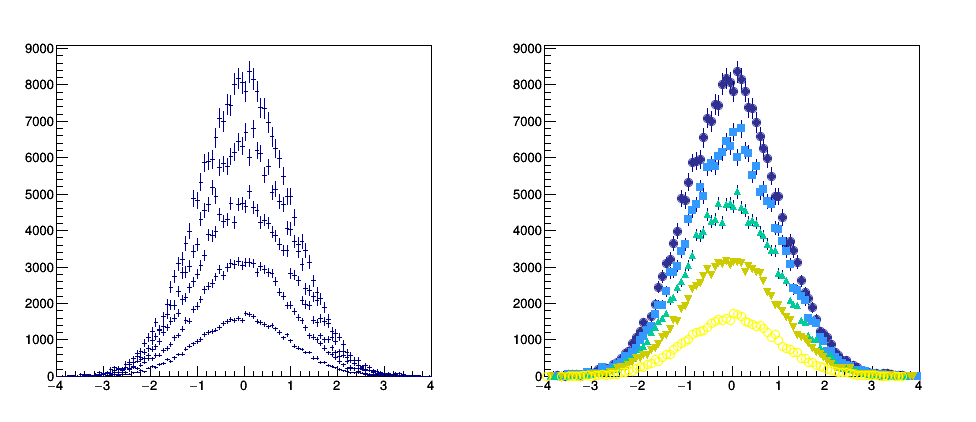

In [4]:
// We will take real example from root documentation (a bit simplified). You can see it here:
//https://root.cern/doc/master/histpalettecolor_8C.html
C = new TCanvas("C", "C",980,450);
C->Divide(2,1);
C->cd(1);
for (Int_t j = 0; j <5; ++j) {
    hsBeforeStyling[j] = new TH1F (TString::Format("h%d", j).Data(),"",100,-4,4);
    hsBeforeStyling[j]->SetStats(kFALSE);
    for (Int_t i = 0; i < 25000; ++i) {
        rng.Rannor(px,py);
        hsBeforeStyling[j]->Fill(px,10-j*2);
    }
    if (j == 0)
      hsBeforeStyling[j]->Draw("");
    else
      hsBeforeStyling[j]->Draw("SAME");
      hsAfterStyling[j] = (TH1F *)hsBeforeStyling[j]->Clone(TString::Format("hn%d", j).Data());
}

C->cd(2);
hsAfterStyling[0]->SetMarkerStyle(kFullCircle);
hsAfterStyling[1]->SetMarkerStyle(kFullSquare);
hsAfterStyling[2]->SetMarkerStyle(kFullTriangleUp);
hsAfterStyling[3]->SetMarkerStyle(kFullTriangleDown);
hsAfterStyling[4]->SetMarkerStyle(kOpenCircle);
hsAfterStyling[0]->SetMarkerColor(928);
hsAfterStyling[1]->SetMarkerColor(kAzure+1);
hsAfterStyling[2]->SetMarkerColor(kTeal-1);
hsAfterStyling[3]->SetMarkerColor(kYellow+1);
hsAfterStyling[4]->SetMarkerColor(5);
for (Int_t j = 0; j <5; ++j) {
     if (j == 0)
      hsAfterStyling[j]->Draw("");
    else
      hsAfterStyling[j]->Draw("SAME");
}
C->Draw();

<p>Now we've got our canvas with 5 simple gauses or TH1F objects and we modified the style of it using macro style coding.</p>
<h5>Now lets see how it looks like with CSS file:</h5>
<br>
Before we start, let's clearify one moment: here we are using jupyter notebook, so I will define style right here, but in real case more native is create file with .css extension for it. Almost all modern editors and ide supports hightlighting of css syntax, so you css style could looks like:

<img src="https://pp.userapi.com/c849232/v849232054/26e33/L4VnF1DGf9c.jpg">
<br>
<p>In order to add your style you should use this function:</p>

```c++
AliDrawStyle::RegisterCssStyle(const char *nameOfAddingStyle, TObjArray *arrayWithStyle);
```

<p>arrayWithStyle consists from TNamed objects, Name of this objects describes selectors and Title describes declarations. In normal case you can parse your <b>.css</b> file into array using 
```c++
AliDrawStyle::ReadCSSFile("fullName.css"));
```
So registration of style should looks like:
```c++
AliDrawStyle::RegisterCssStyle("nameOfyourStyle", AliDrawStyle::ReadCSSFile("path/to/your/file.css"));
```
But I want to make my notebook regardless of side files, so we will create array manually:

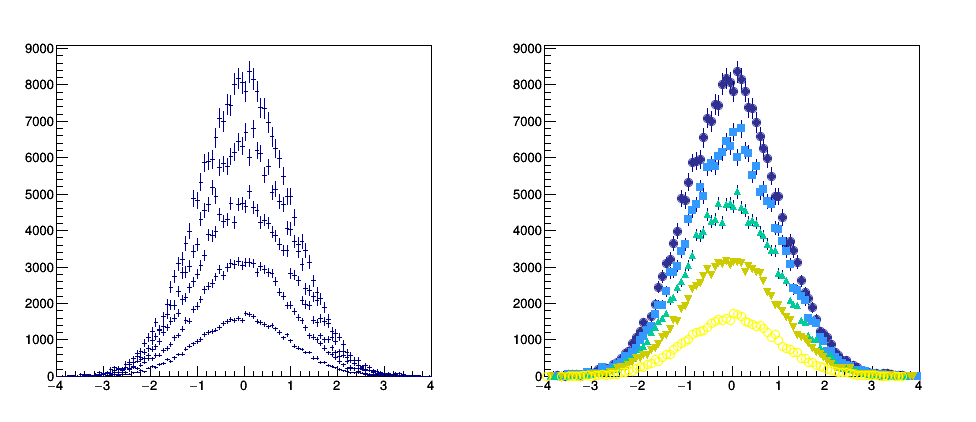

In [5]:
// Let's define TString with the same style as in example above: selector and declaration
// Pay your attention to the csv interface for values for properties. 
// This is a main difference with the real css.
cssString = "TH1F {\n\
                   marker-style: 20,21,22,23,24;\n\
                   marker-color: 928,861,839,401,5;\n\
                  }";
// Then we should register our style, it means upload all values into the memory.
// Do not forget register your style after moifications.
AliDrawStyle::RegisterCssStyle("test", AliDrawStyle::ReadCssString(cssString));
// Finally just apply your style to pad or canvas with your objects, 
// it works recursively for each object including pads or canvas.
AliDrawStyle::ApplyCssStyle(((TPad *)C->cd(2)), "test");
C->Draw();

<h3>Exercise 1:</h3>
<p><b>Try to play with style. Change styles of markers, colors, sizes:</b></p>

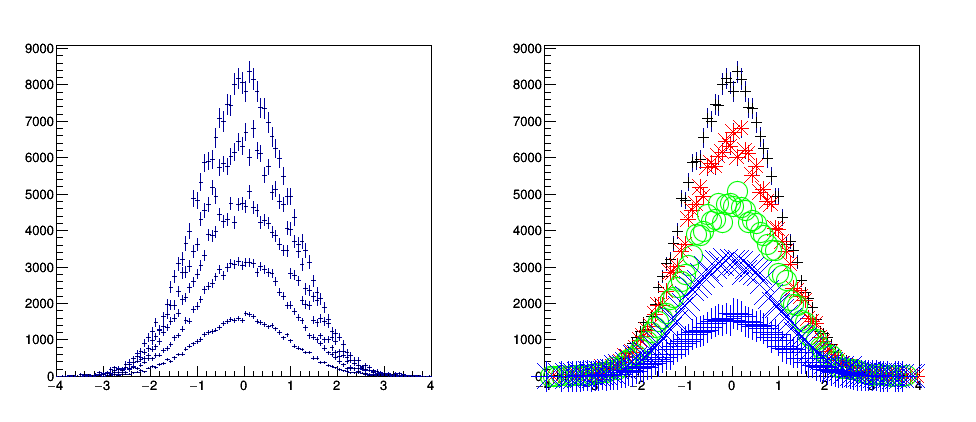

In [6]:
// please try to play with it
// try to change style as you wish
cssString = "TH1* {\n\
                    marker-style: 2,3,4,5,2;\n\
                    marker-color: 1,2,3,4,4;\n\
                    marker-size:10px,15px,20px,25px,30px;\n\
                  }";
AliDrawStyle::RegisterCssStyle("exc1", AliDrawStyle::ReadCssString(cssString));
AliDrawStyle::ApplyCssStyle(((TPad *)C->cd(2)), "exc1");
C->Draw();

 <a id='style_css_local'></a>
<h5 align="left" style="font-size:25px;text-indent: 30px;">3.3 Local styles</h5>
<p>As in <b>real web development</b> you can set style right in name of your object. In this case such style will have highest priority and the rest style in file will be ignore for this object and specified property. Let see how it works:</p>

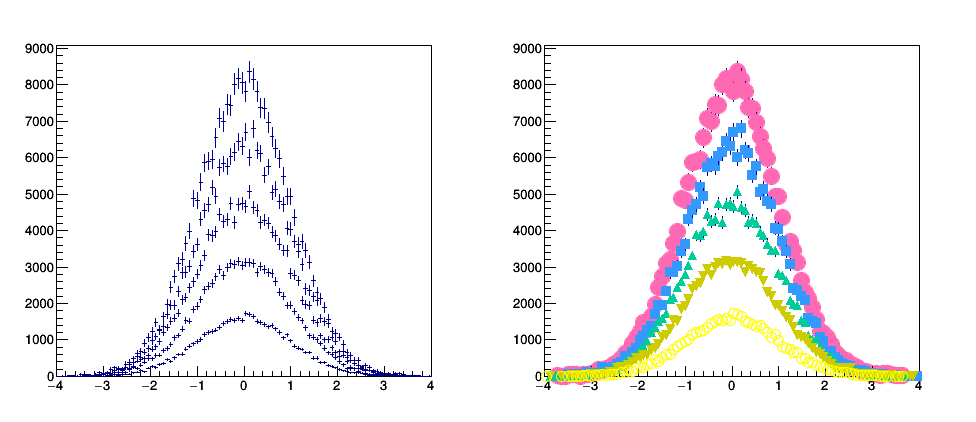

In [7]:
hsAfterStyling[0]->SetName("nm.style(marker-color:#ff69b4;marker-size:2;)");
// As you can see color and size of first object will not change after reading string with style, because it
// defined locally in the name of object;
cssString = "TH1F {\n\
                    marker-style: 20,21,22,23,24;\n\
                    marker-color: 928,861,839,401,5;\n\
                    marker-size:10px;\n\
                  }";
AliDrawStyle::RegisterCssStyle("test", AliDrawStyle::ReadCssString(cssString));
AliDrawStyle::ApplyCssStyle(((TPad *)C->cd(2)), "test");
C->Draw();

 <a id='style_css_app'></a>
<h5 align="left" style="font-size:25px;text-indent: 30px;">3.4 Applications</h5>
<p>Untill now we used only elementID let's see how we can use css in simple <b>alarm application:</b></p>

</p>Let's imagine that we have some parameter, which should not be more than some value. You can specify style for three cases:</p>
   *  <span style="font-size:20px; color: green">Normal</span><span style="font-size:20px;">: a <= 4000;</span>
   *  <span style="font-size:20px; color: blue">Warning</span><span style="font-size:20px;">: 4000 < a < 6000;</span>
   *  <span style="font-size:20px; color: red">Alarm</span><span style="font-size:20px;">: a >= 6000;</span>


In [8]:
%%cpp
void CheckState(TH1F *his) {
  exC1 = new TCanvas("exC1", "exC1",980,450);
  exC1->cd(1);
  if(his->GetMaximum()<=4000)
    his->SetName("h.class(normal)");
  else if (his->GetMaximum()>4000 && his->GetMaximum()<6000)
    his->SetName("h.class(warning)");
  else if (his->GetMaximum()>600)
    his->SetName("h.class(alarm)");
  his->Draw();
}

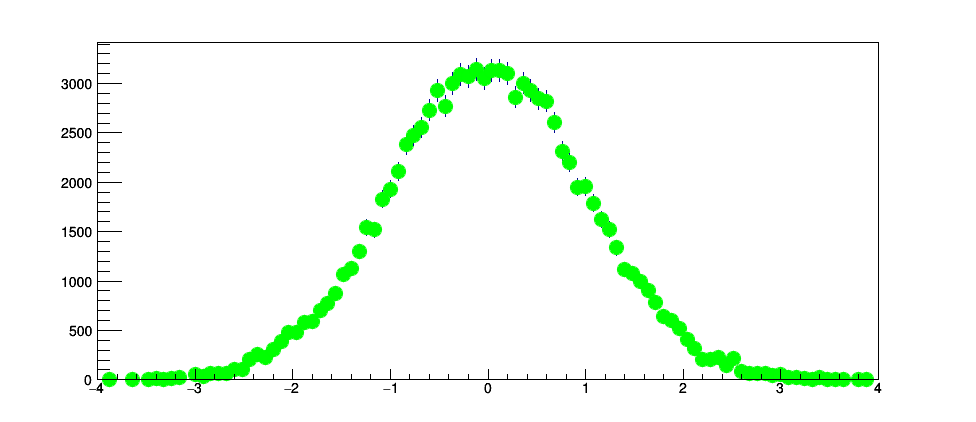

In [9]:
cssString = ".normal {\n\
                        marker-style:20;\n\
                        marker-color:#00ff00;\n\
                        marker-size:15px;\n\
                      }\n\
                      \
             .warning {\n\
                        marker-style:21;\n\
                        marker-color:rgb((0,0,255);\n\
                        marker-size:2;\n\
                        }\n\
                        \
             .alarm {\n\
                        marker-style:22;\n\
                        marker-color:2;\n\
                        marker-size:15px;\n\
                    }";
CheckState(hsBeforeStyling[3]);
AliDrawStyle::RegisterCssStyle("alarm", AliDrawStyle::ReadCssString(cssString));
AliDrawStyle::ApplyCssStyle(exC1, "alarm");
exC1->Draw();

<h3>Exercise 2:</h3>
<p><b>Below I provide canvas with objects for you and show list of part properties which you can manage. Try to do with it whatever you want:</b></p>
<p>Some properties of objects which you can change using css:</p>
* marker-color
* marker-size
* marker-style
* line-color
* line-width
* line-style
* fill-color
* fill-style
* gridX
* gridY
* fill-color
* tickX
* tickY

Warning in <TCanvas::Constructor>: Deleting canvas with same name: C


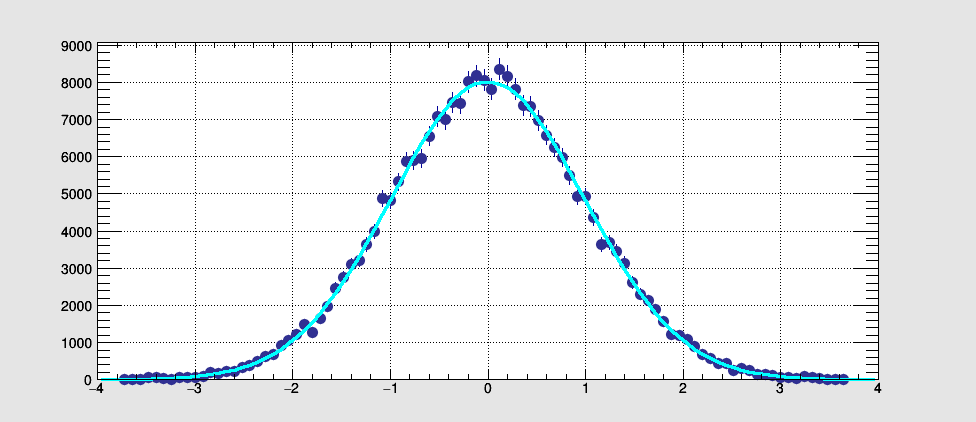

 FCN=73.3518 FROM MIGRAD    STATUS=CONVERGED      54 CALLS          55 TOTAL
                     EDM=1.1917e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     8.01647e+03   6.21626e+01   2.13784e-01   9.41206e-06
   2  Mean        -1.06142e-03   6.29589e-03   2.65062e-05   8.75563e-03
   3  Sigma        9.92526e-01   4.45151e-03   5.12724e-06   2.81539e-01


In [10]:
// please try to play with it
// try to change style as you wish
C = new TCanvas("C", "C",980,450);
pad = new TPad("pad", "pad",0,0,1,1);
pad->Draw();
pad->cd();
hsBeforeStyling[0]->Fit("gaus");
hsBeforeStyling[0]->Draw("");
C->Draw();

//let's change something:
cssString = "TH1* {\n\
                    marker-style:20;\n\
                    marker-color: 928;\n\
                    marker-size:10px;\n}\n\
                                          \
             TF1* {\n\
                    line-color:7;\n\
                    line-width:3;\n\
                  }\n\
                     \
             TPad {\n\
                    gridX:1;\n\
                    gridY:1;\n\
                    fill-color:#e4e4e4;\n\
                    tickX:1;\n\
                    tickY:1;\n\
                    }";

AliDrawStyle::RegisterCssStyle("exc2", AliDrawStyle::ReadCssString(cssString));
AliDrawStyle::ApplyCssStyle(C, "exc2");

C->Draw();

<a id='draw'></a>
<h4 align="left" style="font-size:35px;">4. Projections analysis of n-dimensional histograms</h4>
<p>Here we closer look to the tools for drawing, fitting, slicing of projections of n-dimensional histograms. This class called <b>AliPainter</b>.</p>

<a id='draw_purposes'></a>
<h5 align="left" style="font-size:25px;text-indent:30px;">4.1 Purposes</h5>
<p>Our goal is provide to user full access to the data. You can work with n-dimensional histogram and build your own projections don't care about lost data.</p>
<p>Two main functions called:</p>
   <p style="font-size:20px;text-indent:30px;">1. AliPainter::DrawHistogram();</p>
   <p style="font-size:20px;text-indent:30px;">2. AliPainter::DivideTPad();</p>


<a id='draw_interface'></a>
<h5 align="left" style="font-size:25px;text-indent:30px;">4.2 Interface of AliPainter::DrawHistogram()</h5>
<p>Let see what you can do with our tool. Now we've next features:</p>
   <p style="font-size:20px;text-indent:30px;">1. Building 1d,2d,3d projections;</p>
   <p style="font-size:20px;text-indent:30px;">2. Setting ranges, including smart slicers (python arrays syntax);</p>
   <p style="font-size:20px;text-indent:30px;">3. Standart root fitters and only for root5 fitter created by AliTMinuitToolkit;</p>
   <p style="font-size:20px;text-indent:30px;">4. Drawing option including adding classes, local styles and divisions;</p>
<br>

<p>Here is the interface which we provide to you for working with THnBase.</p>

```c++
static void AliPainter::DrawHistogram(THnBase *hisN, const char *expression, TPad *pad=nullptr,\
                                      TObjArray *keepArray=nullptr, TObjArray *metaData=nullptr,\
                                      Int_t verbose=0);

static void AliPainter::DrawHistogram(const TObjArray *histogramArray, const char *expression, TPad *=nullptr,\
                                      TObjArray *=nullptr, TObjArray *=nullptr, Int_t =0);
```

<p><i>As you can see here AliPainter::DrawHistogram() is overloaded method, wich allows to use array of THnBase objects or directly THnBase object.</i></p>


<h5>Description of arguments:</h5>
<p style="text-indent: 30px;"><span style="font-size:15px;"><b>◉ hisN(histogramArray)</b></span><span> - input n-dimensional histogram (array of n-dim histograms) which projections you want to draw;</span></p>
<p style="text-indent: 30px;"> <span style="font-size:15px;"><b>◉ expression</b></span> <span> - special query which allows to specify ranges, projections, fitters, drawing options. In general, input expression looks like </span></p>
<p style="text-indent: 40px;">histogramName(`<axisRanges`>)(`<projection string`>)(`<fitting string`>)(`<drawing string`></p>

<p style="text-indent: 40px;"><b>◆ `<axisRanges`></b> - string specify which slice of your THn you want to draw:</p>

<p style="text-indent: 50px;">1. (0,10,0,20,0,30) using integer numbers will return:</p>

```c++
                              THn::GetAxis(0)->SetRange(0,10)
                              THn::GetAxis(1)->SetRange(0,20)
                              THn::GetAxis(2)->SetRange(0,30)
```

<p style="text-indent: 50px;">2. (0.,10.,0.,20.,0.,30.) using float numbers will return:</p>

```c++
                              THn::GetAxis(0)->SetRangeUser(0.,10.)
                              THn::GetAxis(1)->SetRangeUser(0.,20.)
                              THn::GetAxis(2)->SetRangeUser(0.,30.)
```

<p style="text-indent: 50px;">3. (0,10,0:20:10:10,0,30) using python array slicers (:) will return to user array of histograms. Algorithm of generating slices is (start:finish:step:delta)</p>

    
```c++
                              for (auto i = start; i <= finish - delta; i+=step)
                              {
                                  startVal = i;
                                  finishVal = i + delta;
                              }
```

<p style="text-indent:50px;">E.g. 0:20:10:10 will be transform into</p>

```c++
                              0,10;10,20;
```

<p style="text-indent: 50px;"> So, in our example ranges will be:</p>

```c++
                              //hisN1
                              THn::GetAxis(0)->SetRange(0,10)
                              THn::GetAxis(1)->SetRange(0,10)
                              THn::GetAxis(2)->SetRange(0,30)
                              //hisN2
                              THn::GetAxis(0)->SetRange(0,10)
                              THn::GetAxis(1)->SetRange(10,20)
                              THn::GetAxis(2)->SetRange(0,30)    
```

<p style="text-indent: 40px;"><b>◆ `<projectionsString`></b> - specify what projections you want to get:</p>
<p style="text-indent: 50px;">new projection created THn his = hisInput->Projection(i0,i1....);</p>
<p style="text-indent: 50px;">at minimum one dimension should be specified, maximum 3D;</p>

<p style="text-indent: 40px;"><b> ◆ `<fitString`> </b> - (fitterName,fitOption,ranges):</p>
<p style="text-indent: 50px;"><b>1. fitterName</b> - standard root fit functions. Also supports AliTMinuitToolkit fitters, but only in root5);</p>
<p style="text-indent: 50px;"><b>2. fitOption</b> - standard root fit options. For root 5 also you can look to AliTMinuitToolkit fitOptions;</p>
<p style="text-indent: 50px;"><b>3. range</b> - {x0min,x0max,x1min,xm1max,...} in case not specified - range is not set;</p>

<a id='drawString'></a>
<p style="text-indent: 40px;"><b>◆ `<drawString`> </b> - (div, lims, className, drawOpt):</p>
<a id='div'></a>
<p style="text-indent: 50px;"><b>1. padDiv</b> - parameter which specified switch pad option:</p>
<p style="text-indent: 60px;"><b>div = 0</b> - use the same pad for drawing; (default value);</p>
<p style="text-indent: 60px;"><b>div = 1</b> - switch from current pad to the next pad for drawing;</p>
<p style="text-indent: 50px;"><b>2. lims</b> - allows to set limits for specified axis(not specified by default). Support statistical units and expressions:</p>
<p style="text-indent: 60px;"><b>xlim = [xmin, xmax]</b> - set the minima and maxima for x-axes;</p>
<p style="text-indent: 60px;"><b>ylim = [ymin, ymax]</b> - set the minima and maxima for y-axes;</p>
<p style="text-indent: 70px;"><b>2.1 Numbers:</b> ylim=[100,200];</p>
<p style="text-indent: 70px;"><b>2.2 Stats units:</b> ylim=[<min>, <max>];</p>
<p style="text-indent: 70px;"><b>2.3 Expression with stat units:</b></p>
<p style="text-indent: 90px;"><b>ylim=[0.5*`<mean`>,1.5*`<mean`>]</b> - or whatever according with TFormula rules;</p>
<p style="text-indent: 60px;"><b>zlim = [zmin, zmax]</b> - set the minima and maxima for z-axes;</p>
<p style="text-indent: 50px;"><b>3. className</b> - adds name of class to each object of drawing. It necessary for applying css style. [See AliDrawStyle](http://alidoc.cern.ch/AliRoot/master/class_ali_draw_style.html)</p>
<p style="text-indent: 60px;"><b>class = [Raw,Error]</b> - in the end of name of object will add ".class(Raw,Error)";</p>
<p style="text-indent: 60px;"><b>class = Raw</b> - the same with class=[Raw] will add .class(Raw);</p>
<p style="text-indent: 60px;"><b>class = []</b> - in this case nothing will add to the end of the name of object (default);</p>
<p style="text-indent: 50px;"><b>4. drawOpt</b> - root standard draw options [see docs](https://root.cern.ch/root/htmldoc/guides/users-guide/Histograms.html#draw-options)</p>
<br>

<p style="text-indent: 30px;"><span style="font-size:15px;"><b>◉ pad</b></span><span> - you can specify which pad you want to use for drawing. In case div=1 in drawingOptions this pad will be starting point. (by default NULL and DrawHistogram use gPad)</span></p>

<p style="text-indent: 30px;"><span style="font-size:15px;"><b>◉ keepArray</b></span><span> - array for keeping temporary objects.</span></p>

<p style="text-indent: 30px;"><span style="font-size:15px;"><b>◉ metaData</b></span><span> - array with metadata describing histogram.</span></p>

<a id='draw_examples'></a>
<h5 align="left" style="font-size:25px;text-indent: 30px;">4.3. Examples of usage AliPainter::DrawHistogram()</h5>
<p>First of all let's prepare the data. Let's use something more real then our histogram before.</p>
<a id='draw_examples_data'></a>
<h5 align="left" style="font-size:20px;text-indent: 40px;">4.3.1 Data preparation</h5>

In [11]:
// we prepared file which you can download without registration. let's use it:
finput = TFile::Open("http://aliqatrkeos.web.cern.ch/aliqatrkeos/performance/AliPainterTest.root","CACHEREAD");
tree = (TTree *) finput->Get("hisPtAll");
keys = finput->GetListOfKeys();
// then we created array with THn histograms
hisArray = new TObjArray();
for (Int_t iKey = 0; iKey<keys->GetEntries();iKey++) {
    TObject *o = finput->Get(TString::Format("%s;%d", keys->At(iKey)->GetName(), ((TKey *) keys->At(iKey))->GetCycle()).Data());
    hisArray->AddLast(o);
}

Info in <TFile::OpenFromCache>: using local cache copy of http://aliqatrkeos.web.cern.ch/aliqatrkeos/performance/AliPainterTest.root [./aliqatrkeos/performance/AliPainterTest.root]


<a id='draw_examples_analysis'></a>
<h5 align="left" style="font-size:20px;text-indent: 40px;">4.3.2 Projection analysis</h5>
<p>Let's move step by step. First of all for the projections analysis we should get the projections:</p>

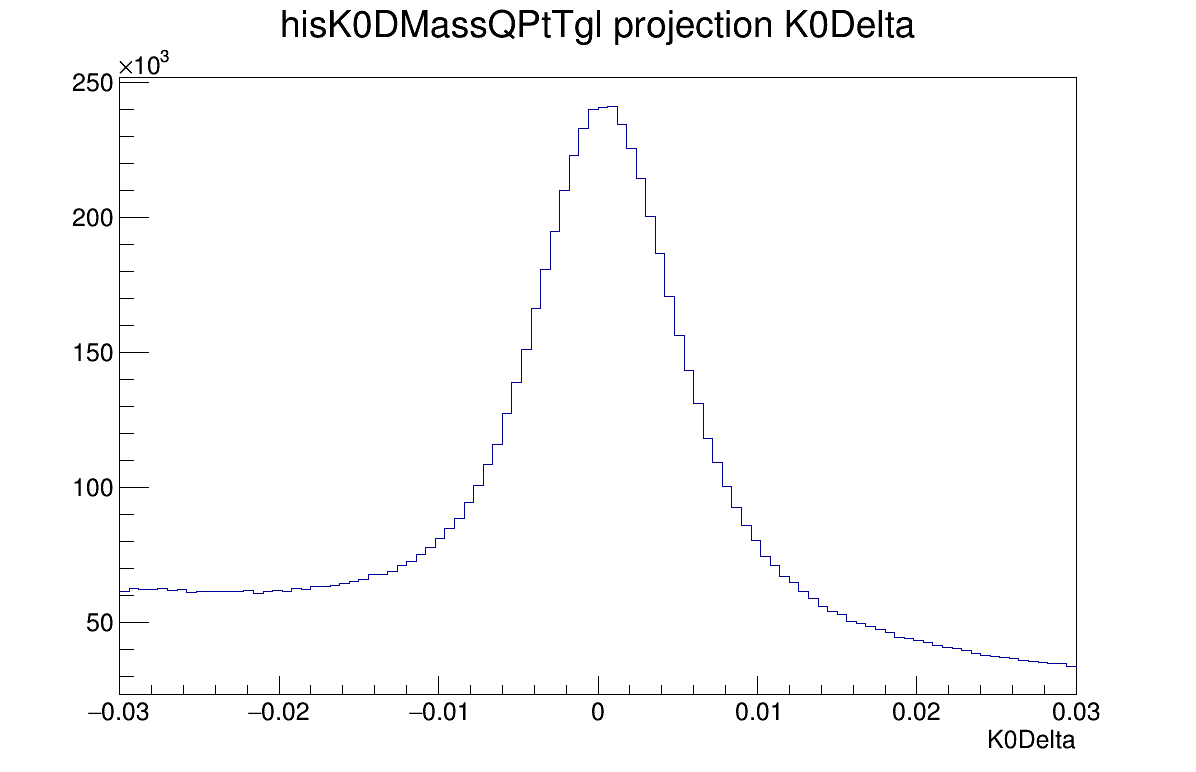

In [12]:
canvasQA = new TCanvas("canvasQA", "canvasQA", 1200, 800);
AliPainter::DrawHistogram(hisArray, "hisK0DMassQPtTgl()(0)()()");
canvasQA->Draw();

<p>Now let's choose some part of ranges:</p>

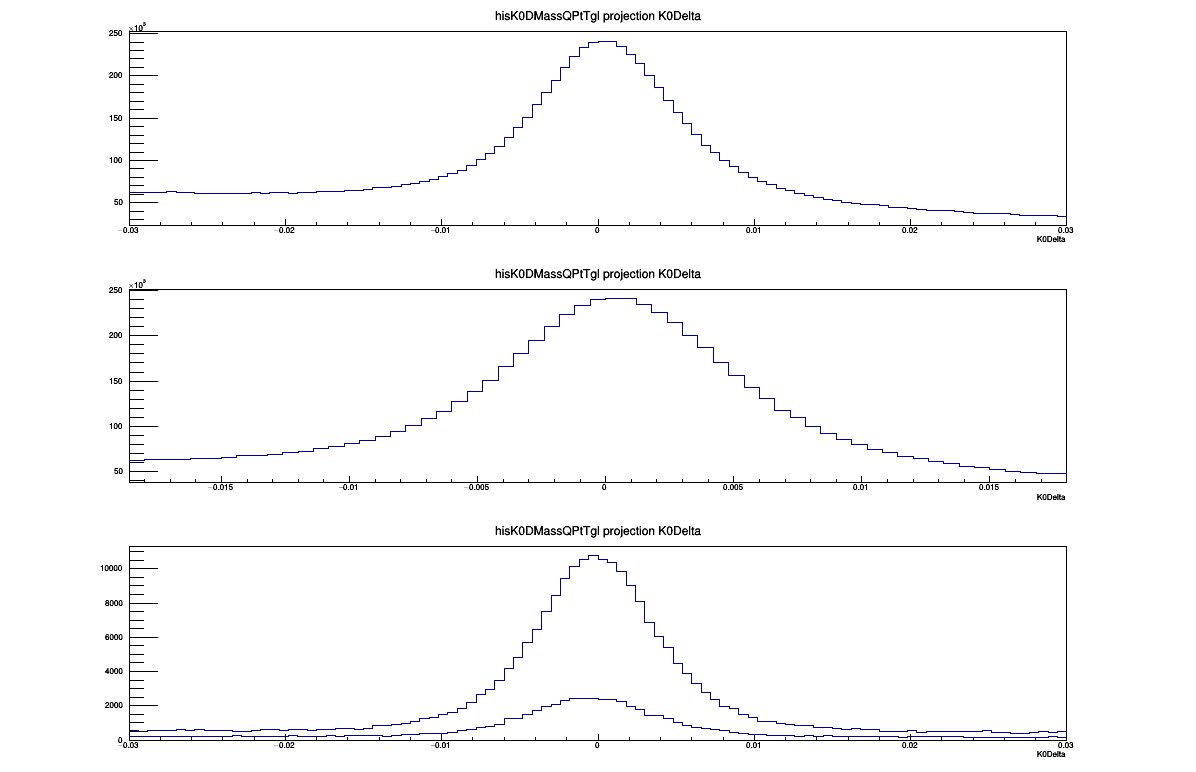

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvasQA


In [13]:
// if you don't remember numbers of bin you can use float numbers for ranges, it means that SetRangeUser will be used:
canvasQA = new TCanvas("canvasQA", "canvasQA", 1200, 800);
canvasQA->Divide(1,3);
canvasQA->cd(1);
AliPainter::DrawHistogram(hisArray, "hisK0DMassQPtTgl(-0.01,0.01)(0)()()");
canvasQA->Draw();
// in the other case you can use just number of bins:
canvasQA->cd(2);
AliPainter::DrawHistogram(hisArray, "hisK0DMassQPtTgl(20,80)(0)()()");
canvasQA->Draw();
// let's see how we can use slicers. Imagine that you can see all bins of first projections and
// two periods of second projection, let it bee 40,60 and 60,80, if we know that total of bins are 80:
canvasQA->cd(3);
AliPainter::DrawHistogram(hisArray, "hisK0DMassQPtTgl(0,100,40:80:20:20)(0)()()");
canvasQA->Draw();

<p>Pay your attention to the last pad. As you can see here it provide us two histogram on the one pad, but you be able to change it using <b>[div](#div)</b> flag in [drawString](#drawString). Let's see what happend if we add it, but first of all we should prepare two pads:</p>

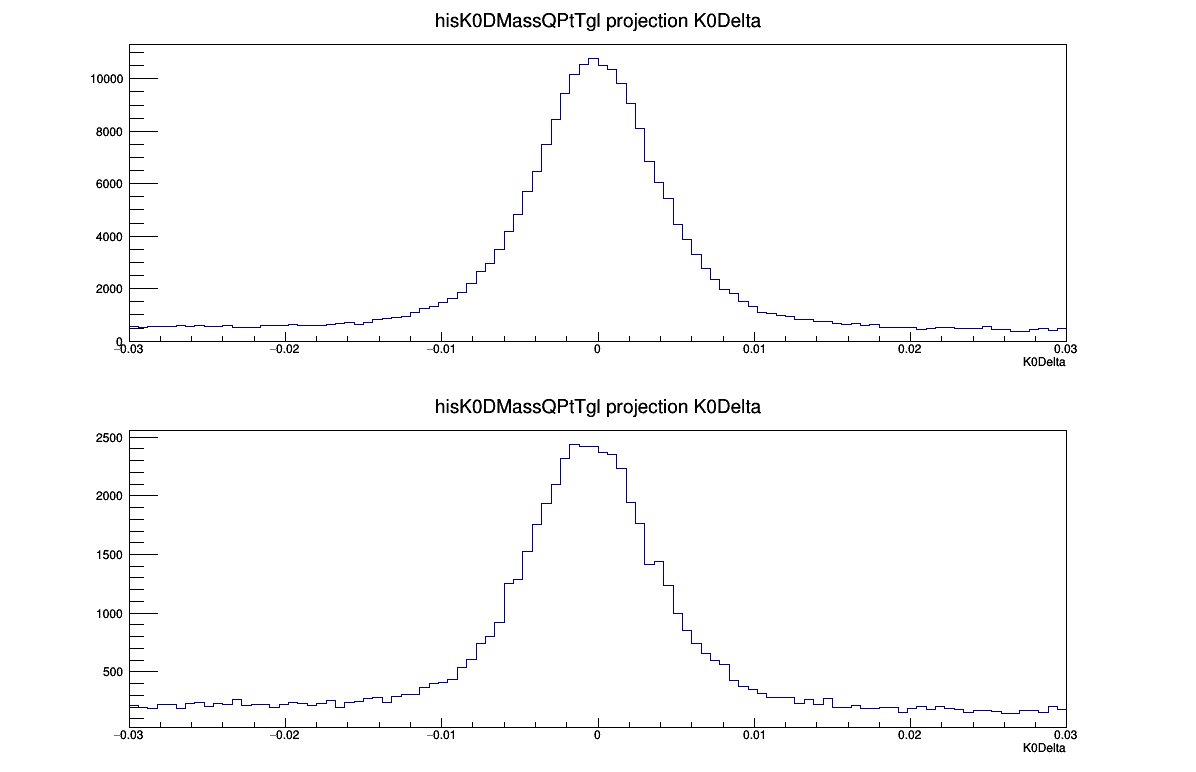

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvasQA
Warning in <TFile::Append>: Replacing existing TH1: hisK0DMassQPtTgl.ranges(0,100,40,60)_proj_0 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hisK0DMassQPtTgl.ranges(0,100,40,60,0,100,60,80)_proj_0 (Potential memory leak).


In [14]:
canvasQA = new TCanvas("canvasQA", "canvasQA", 1200, 800);
canvasQA->Divide(1,2);
canvasQA->cd(1);
AliPainter::DrawHistogram(hisArray, "hisK0DMassQPtTgl(0,100,40:80:20:20)(0)()(div=1)");
canvasQA->Draw();

<p>As you can see in output of previous cell AliPainter switched active pad automatically. It means that you can use set of pads and we also provided to you opportunity to dividing pads, but we will tell about it later. Let's go further and let's see to fitting option and add drawOpt:</p>

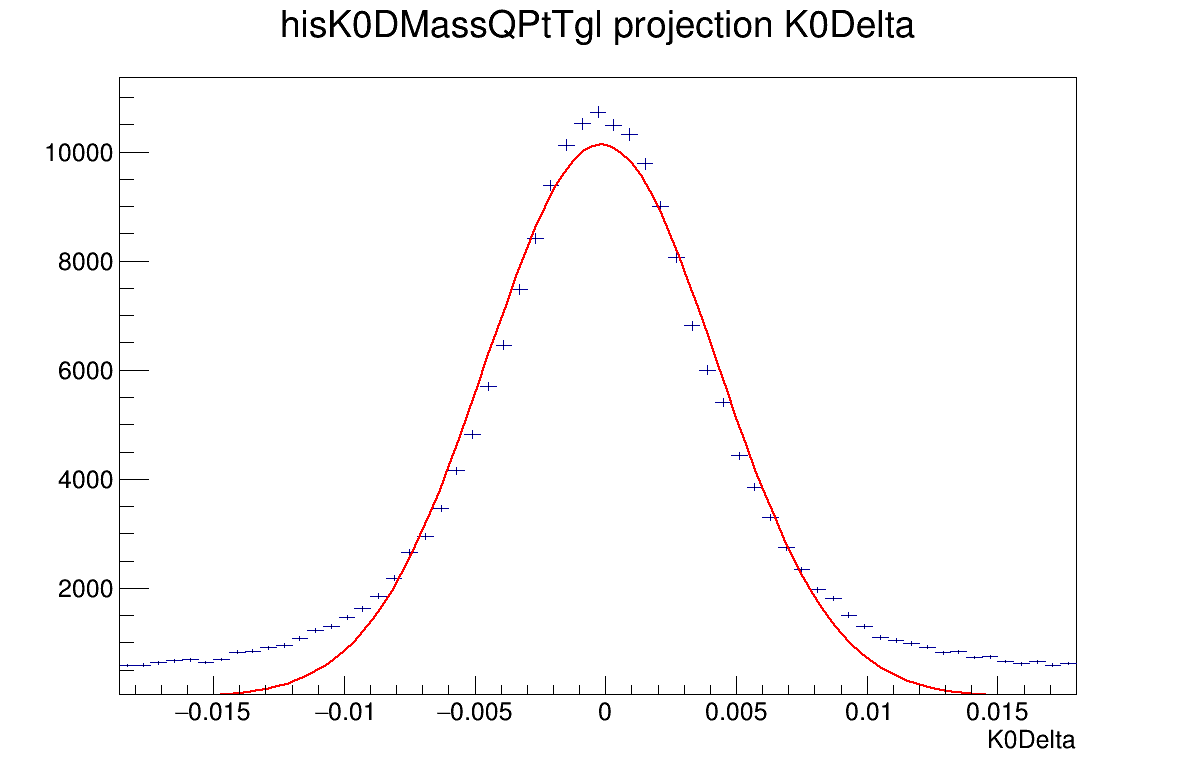

 FCN=1.81567e+07 FROM MIGRAD    STATUS=CONVERGED      73 CALLS          74 TOTAL
                     EDM=9.80376e-12    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.3 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.01328e+04   3.57940e-01  -2.34384e-04   1.07188e-05
   2  Mean        -1.50485e-04   1.70800e-07   2.94877e-10   2.72341e+01
   3  Sigma        4.41587e-03   1.97307e-07  -1.96861e-08   3.52321e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvasQA


In [15]:
canvasQA = new TCanvas("canvasQA", "canvasQA", 1200, 800);
AliPainter::DrawHistogram(hisArray, "hisK0DMassQPtTgl(20,80,40,60,0,10)(0)(name=gaus,option=W)(drawOpt=E)");
canvasQA->Draw();

<p>Now let's talk about divisions of canvas.</p>

****

<a id='pad_div'></a>
<h4 align="left" style="font-size:35px;">5. Division of plotting area</h4>
<p>How you already know in root we have canvases and pads. We can use our dividing function to both of this classes.</p>

***

<a id='pad_div_interface'></a>
<h5 align="left" style="font-size:25px;text-indent: 30px;">5.1 Interface of AliPainter::DivideTPad()</h5>
<p>Let see what you can do with our tool. Now we've next features:</p>
   <p style="font-size:20px;text-indent: 30px;">1. You can get any combinations of pads on the canvas;</p>
   <p style="font-size:20px;text-indent: 30px;">2. Share axis in order to combine pads;</p>
   <p style="font-size:20px;text-indent: 30px;">3. Set any margin values in pixels;</p>
<br>
<p>Main function for dividing is:</p>

```c++
AliPainter::DivideTPad(TPad *pad, const char *division, const char *classID="",\
                       const char *style="", Int_t verbose=0)
```

<p style="text-indent: 30px;"><span style="font-size:15px;"><b>◉ pad</b></span><span> -  input pad or canvas.</span></p>
<p style="text-indent: 30px;"><span style="font-size:15px;"><b>◉ division string</b></span><span> - `<orientation`>`[numberOfPads`[sharedMargin`]`[units`]`, numberOfPads`[shareMargin`]`[units`]`, ...].</span></p>
<p style="text-indent: 40px;"><b>◆ orientation </b> - (vertical, horizontal):</p>
<p style="text-indent: 50px;"><b>vertical</b> - it's allows to you choose vertical orientation</p>
<p style="text-indent: 50px;"><b>horizontal</b> - it's allows to you choose vertical orientation (default)</p>
<p style="text-indent: 40px;"><b>◆ numberOfPads </b> - it should be specify like csv array. E.g. "1,1" it means two pads. If orientation is vertical it will looks like column, if horizontal like row. Also you can specify more than one pad: e.g in this case "2,1" it means in case horizontal orientation two pads in first row and one in the second raw. So in case of horizontal orientation count of numbers will be count of rows and the number will be specify number of pads in row. In case vertical orientation it will look like you transpose you horizontal orientation.</p>
<p style="text-indent: 40px;"><b>◆ sharedMargin </b> - this option allows to you choose wich margin you want to make equal to 0: Each pad has 4 margin(b-bottom, l-left, t-top, r-right). So in case you specify t, it will set top margin to 0, etc. One more useful value is "m" - middle, in case of horizontal orientation it will set right and left margin to 0, in case of vertical orientation top and bottom margin will set to 0. </p>
<p style="text-indent: 40px;"><b>◆ units </b> - you can set value to the chosen margin explicitly. For that you should specify value and units. E.g. b0.3 means set bottom margin 0.3, or rpx100 means set right margin 100 pixels.</p>
<p style="text-indent: 40px;"><b>◆ classID </b> - optional parameter for [styling](#style_css_syn). </p>

Let's look to some examples:
*****
<a id='pad_div_usage'></a>
<h5 align="left" style="font-size:25px;text-indent: 30px;">5.2 Usage of AliPainter::DivideTPad()</h5>
<p>We will use already created histograms.</p>

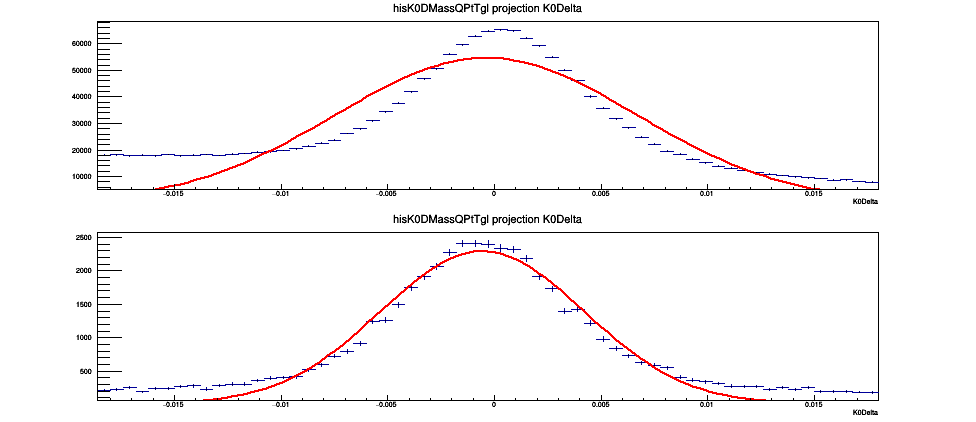

 FCN=3.46253e+09 FROM MIGRAD    STATUS=CONVERGED      67 CALLS          68 TOTAL
                     EDM=2.86699e-11    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.1 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.44882e+04   3.07508e-01   6.77020e-04   2.33802e-05
   2  Mean        -3.63144e-04   4.12936e-08   1.12338e-10  -6.79076e+01
   3  Sigma        7.06094e-03   5.61047e-08  -4.62395e-09  -1.55287e+00
 FCN=1.81567e+07 FROM MIGRAD    STATUS=CONVERGED      65 CALLS          66 TOTAL
                     EDM=9.76987e-12    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.3 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.01328e+04   3.57939e-01  -2.34090e-04   1.07059e-05
   2  Mean        -1.50485e-04   1.70800e-07   2.94613e-10   2.71973e+01

Warning in <TCanvas::Constructor>: Deleting canvas with same name: C


In [16]:
//horizontal orientation
C = new TCanvas("C", "C",980,450);
AliPainter::DivideTPad(C, "horizontal[1,1]");
C->cd(1);
AliPainter::DrawHistogram(hisArray, "hisK0DMassQPtTgl(20,80,20:80:20:20,0,10)(0)(name=gaus,option=W)(drawOpt=E, div=1)");
C->Draw();

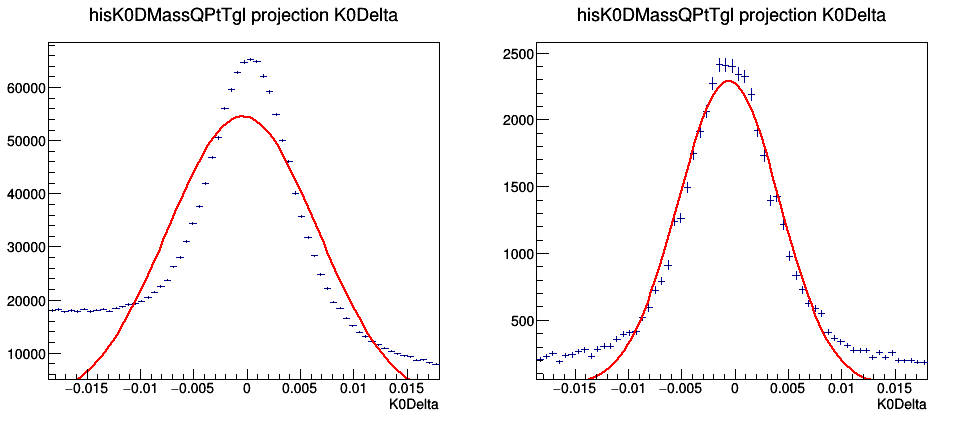

 FCN=3.46253e+09 FROM MIGRAD    STATUS=CONVERGED      66 CALLS          67 TOTAL
                     EDM=2.87864e-11    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.1 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.44882e+04   3.07507e-01   6.77024e-04   2.34560e-05
   2  Mean        -3.63144e-04   4.12936e-08   1.12338e-10  -6.74948e+01
   3  Sigma        7.06094e-03   5.61047e-08  -4.62401e-09  -1.55287e+00
 FCN=1.81567e+07 FROM MIGRAD    STATUS=CONVERGED      65 CALLS          66 TOTAL
                     EDM=9.76008e-12    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.3 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.01328e+04   3.57939e-01  -2.34090e-04   1.07123e-05
   2  Mean        -1.50485e-04   1.70800e-07   2.94613e-10   2.71711e+01

Warning in <TCanvas::Constructor>: Deleting canvas with same name: C


In [17]:
//vertical orientation
C = new TCanvas("C", "C",980,450);
AliPainter::DivideTPad(C, "vertical[1,1]");
C->cd(1);
AliPainter::DrawHistogram(hisArray, "hisK0DMassQPtTgl(20,80,20:80:20:20,0,10)(0)(name=gaus,option=W)(drawOpt=E, div=1)");
C->Draw();

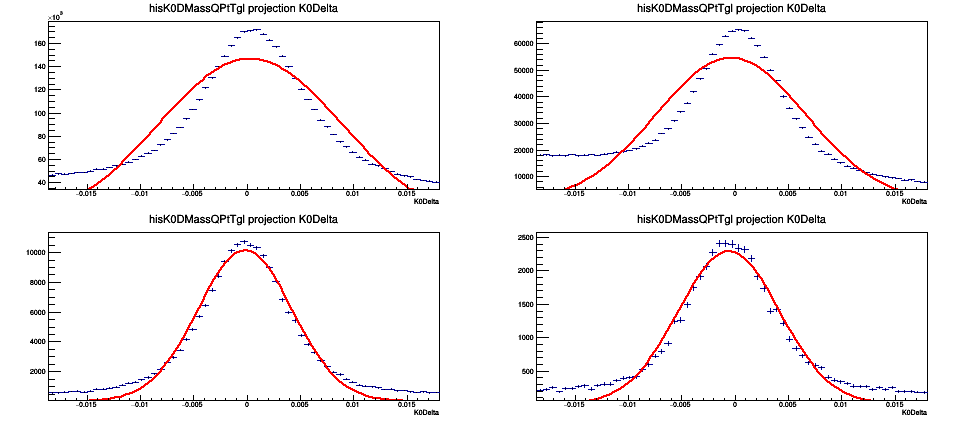

 FCN=1.56598e+10 FROM MIGRAD    STATUS=CONVERGED      70 CALLS          71 TOTAL
                     EDM=2.00411e-09    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   0.8 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.46484e+05   2.60688e-01   3.53247e-04  -2.34974e-04
   2  Mean         3.29816e-04   1.68991e-08   3.89125e-11  -4.39693e+03
   3  Sigma        8.74400e-03   2.11459e-08  -1.44756e-09  -3.80797e+01
 FCN=3.46253e+09 FROM MIGRAD    STATUS=CONVERGED      75 CALLS          76 TOTAL
                     EDM=2.83006e-11    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.1 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.44882e+04   3.07509e-01   6.77002e-04   2.31149e-05
   2  Mean        -3.63144e-04   4.12936e-08   1.12337e-10  -6.83204e+01

Warning in <TCanvas::Constructor>: Deleting canvas with same name: C


In [18]:
//horizontal for 2 by 2
C = new TCanvas("C", "C",980,450);
AliPainter::DivideTPad(C, "horizontal[2,2]");
C->cd(1);
AliPainter::DrawHistogram(hisArray, "hisK0DMassQPtTgl(20,80,0:80:20:20,0,10)(0)(name=gaus,option=W)(drawOpt=E, div=1)");
C->Draw();

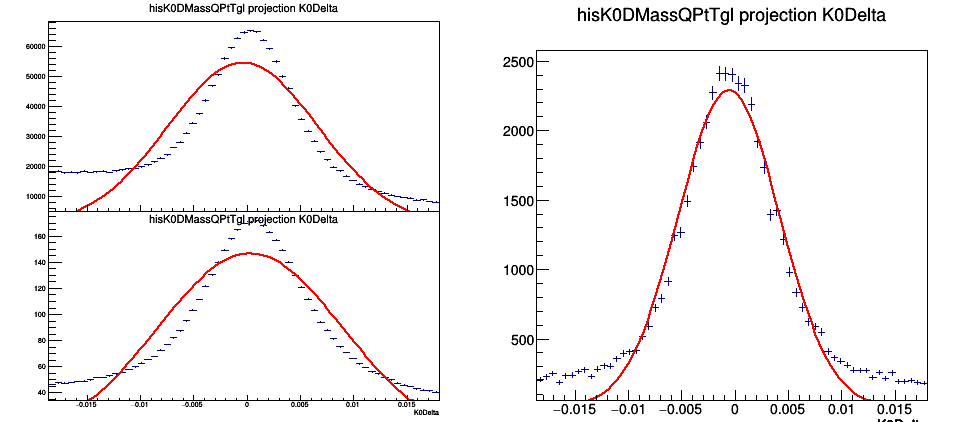

 FCN=1.56598e+10 FROM MIGRAD    STATUS=CONVERGED      78 CALLS          79 TOTAL
                     EDM=5.58847e-06    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   0.8 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.46484e+05   2.60687e-01  -0.00000e+00   1.91044e-03
   2  Mean         3.29816e-04   1.68991e-08  -0.00000e+00   2.13981e+05
   3  Sigma        8.74400e-03   2.11459e-08   0.00000e+00  -2.90531e+03
 FCN=3.46253e+09 FROM MIGRAD    STATUS=CONVERGED      75 CALLS          76 TOTAL
                     EDM=2.82991e-11    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.1 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.44882e+04   3.07509e-01   6.77019e-04   2.31907e-05
   2  Mean        -3.63144e-04   4.12935e-08   1.12338e-10  -6.74948e+01

Warning in <TCanvas::Constructor>: Deleting canvas with same name: C


In [19]:
//vertical for 2 by 1
C = new TCanvas("C", "C",980,450);
AliPainter::DivideTPad(C, "vertical[2m,1tpx50]");
C->cd(1);
AliPainter::DrawHistogram(hisArray, "hisK0DMassQPtTgl(20,80,0:80:20:20,0,10)(0)(name=gaus,option=W)(drawOpt=E, div=1)");
C->Draw();

****

<a id='rep'></a>
<h4 align="left" style="font-size:35px;">6. Building reports</h4>
<p>Let's do something more sophisticated and real.</p>

***

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvasQA


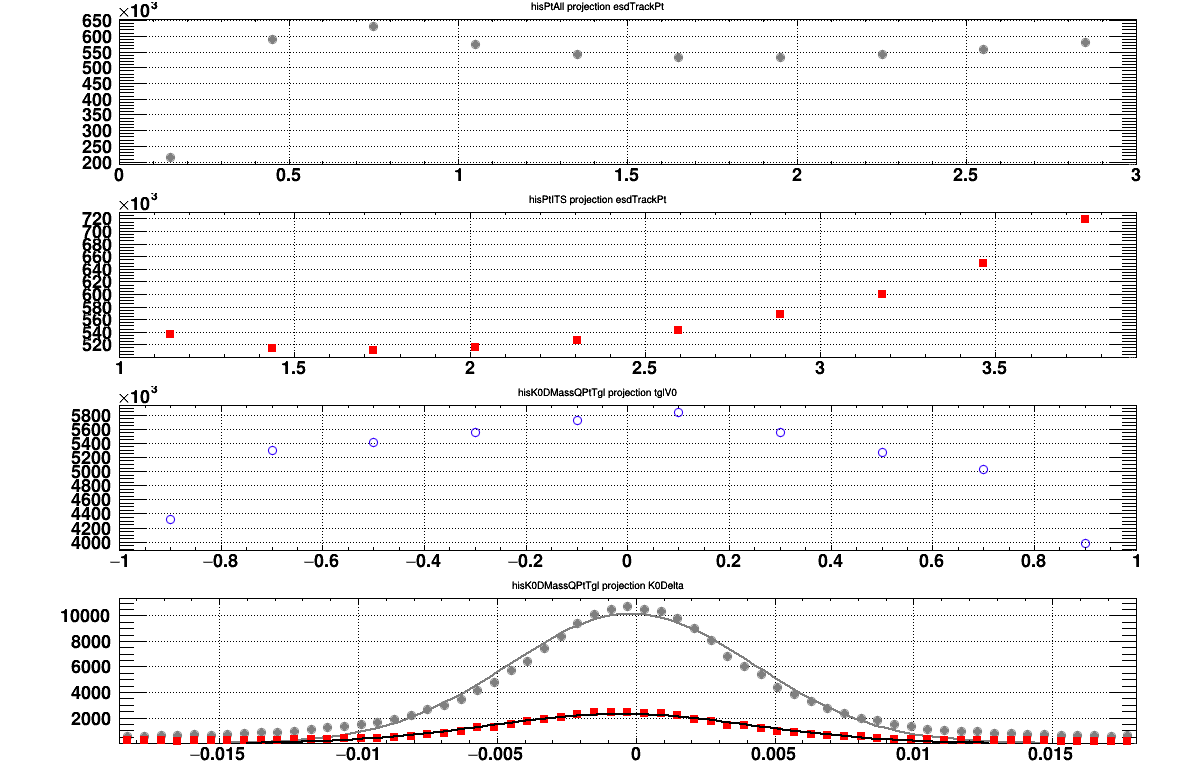

 FCN=1.81567e+07 FROM MIGRAD    STATUS=CONVERGED      61 CALLS          62 TOTAL
                     EDM=9.78594e-12    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.3 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.01328e+04   3.57940e-01  -2.34089e-04   1.07059e-05
   2  Mean        -1.50485e-04   1.70800e-07   2.94613e-10   2.72183e+01
   3  Sigma        4.41587e-03   1.97307e-07  -1.96694e-08   3.53243e-02
 FCN=1.48515e+06 FROM MIGRAD    STATUS=CONVERGED      65 CALLS          66 TOTAL
                     EDM=3.67816e-14    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.7 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.28994e+03   3.49236e-01   1.32828e-04  -7.03872e-07
   2  Mean        -5.37051e-04   7.83511e-07   4.50792e-10   2.49701e-03

In [20]:
canvasQA = new TCanvas("canvasQA", "canvasQA", 1200, 800);
AliPainter::DivideTPad(canvasQA,"horizontal[1,1,1,1]", "Canvas41");
AliPainter::GetNextPad(canvasQA);
//you can find this styles in your sources of AliRoot
AliDrawStyle::RegisterCssStyle("figTemplateHex", AliDrawStyle::ReadCSSFile("$AliRoot_SRC/STAT/test/figTemplateHex.css"));
AliPainter::DrawHistogram(hisArray, "hisPtAll(0,10)(0)()(div=1,drawOpt=E,class=PtAll)");
AliPainter::DrawHistogram(hisArray, "hisPtITS(0,10)(0)()(div=1,drawOpt=E,class=PtIts)");
AliPainter::DrawHistogram(hisArray, "hisK0DMassQPtTgl(1,1)(2)()(div=1,drawOpt=E,class=Tgl)");
AliPainter::DrawHistogram(hisArray, "hisK0DMassQPtTgl(20,80,40:80:20:20,0,10)(0)(name=gaus,option=W)(class=Mass,drawOpt=E)");
AliDrawStyle::ApplyCssStyle(canvasQA, "figTemplateHex");
canvasQA->Draw();